In [6]:
! pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [ ]:

import os
import keras
import numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

os.makedirs("./data", exist_ok = True)

np.savez('./data/train', image=x_train, label=y_train)
np.savez('./data/test', image=x_test, label=y_test)

import sagemaker
sagemaker_session = sagemaker.Session()
bucket_name = sagemaker_session.default_bucket()
input_data = sagemaker_session.upload_data(path='./data', bucket=bucket_name, key_prefix='dataset/mnist')
print('Training data is uploaded to: {}'.format(input_data))

In [ ]:

from sagemaker.tensorflow import TensorFlow
from sagemaker import get_execution_role

role = get_execution_role()
estimator = TensorFlow(
    entry_point = "./mnist_cnn_sagemaker.py",
    role=role,
    train_instance_count=1,
    train_instance_type="ml.m4.xlarge",
    framework_version="1.12.0",
    py_version='py3',
    script_mode=True,
    hyperparameters={'batch-size': 64,
                     'num-classes': 10,
                     'epochs': 1})

estimator.fit(input_data)

In [4]:

predictor = estimator.deploy(instance_type='ml.m4.xlarge', initial_instance_count=1)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


-------------!

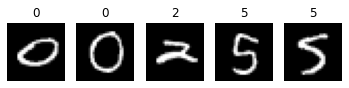

In [7]:

%matplotlib inline
import random
import matplotlib.pyplot as plt

num_samples = 5
indices = random.sample(range(x_test.shape[0] - 1), num_samples)
images, labels = x_test[indices]/255, y_test[indices]

for i in range(num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(labels[i])
    plt.axis('off')


In [8]:
prediction = predictor.predict(images.reshape(num_samples, 28, 28, 1))['predictions']
prediction = np.array(prediction)
predicted_label = prediction.argmax(axis=1)
print('The predicted labels are: {}'.format(predicted_label))

The predicted labels are: [0 0 2 5 5]
